# Análise de ETFs

## Objetivo
Criar duas ou três carterias hipotéticas com diferentes quantidades de ETFs e com estratégias diferentes, e comparar o seu desempenho.

## Habilidades
- Asset Allocation (Alocação de Ativos)
- Backtesting
- Análise de Risco
- Webscraping
- Diversificação

## O que é um ETF?

Um **ETF** (*Exchange-Traded Fund*), ou Fundo de Investimento em Exchange-Traded, é um tipo de fundo de investimento e produto negociado em bolsa de valores, com ações que são negociadas em bolsas de valores, semelhante a ações individuais. Os ETFs são projetados para acompanhar o desempenho de um índice específico, commodity, título ou um conjunto de ativos, e eles fornecem aos investidores exposição a uma carteira diversificada de ativos em um único investimento.

Aqui estão algumas características-chave dos ETFs:

1. **Diversificação**: Os ETFs normalmente mantêm uma carteira diversificada de ativos, que podem incluir ações, títulos, commodities ou outros instrumentos financeiros. Essa diversificação ajuda a espalhar o risco para os investidores.

2. **Liquidez**: Os ETFs são negociados em bolsas de valores ao longo do dia de negociação, assim como ações individuais. Isso fornece aos investidores liquidez, pois eles podem comprar ou vender ações de ETF a preços de mercado sempre que o mercado de ações estiver aberto.

3. **Transparência**: Os ETFs divulgam suas participações diariamente, permitindo que os investidores vejam exatamente quais ativos estão mantidos no fundo. Essa transparência pode ser útil para investidores que desejam entender a composição do fundo.

4. **Baixos Custos**: Os ETFs são conhecidos por terem taxas de despesas relativamente baixas em comparação com fundos mútuos. Isso pode torná-los uma opção atraente para investidores conscientes dos custos.

5. **Eficiência Fiscal**: Os ETFs são estruturados de uma maneira que pode ser eficiente do ponto de vista fiscal, pois podem ter menos distribuições de ganhos de capital em comparação com alguns fundos mútuos.

6. **Flexibilidade**: Os investidores podem usar ETFs para uma variedade de estratégias de investimento, incluindo investimento de longo prazo, negociação de curto prazo e proteção em uma carteira de investimentos.

7. **Desempenho de Mercado**: O valor de um ETF é baseado no desempenho dos ativos subjacentes que ele acompanha. Se o índice ou ativos subjacentes aumentarem de valor, o preço do ETF normalmente aumentará também.

Os ETFs se tornaram veículos de investimento populares para uma ampla gama de investidores, desde investidores individuais de varejo até investidores institucionais, devido à facilidade de acesso, aos benefícios de diversificação e à flexibilidade na construção de carteiras diversificadas. Eles são usados para vários fins, incluindo o acompanhamento do mercado de ações em geral, a obtenção de exposição a setores ou indústrias específicas e a gestão de riscos dentro de uma carteira de investimentos.


## Lista de ETFs negociados no Brasil:
https://br.investing.com/etfs/brazil-etfs

# Setup

In [249]:
# %pip install pandas -q
# %pip install beautifulsoup4 -q
# %pip install yfinance -q
# %pip install requests -q
# %pip install selenium -q

# %pip install --upgrade pandas beautifulsoup4 yfinance requests selenium


## Bibliotecas

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import yfinance as yf
import requests
import numpy as np
import warnings
import seaborn as sns

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

import investpy as inv
from collections import OrderedDict
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import CovarianceShrinkage, risk_models, expected_returns, objective_functions, plotting
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
import vectorbt as vbt

## Constantes

In [2]:
url = 'https://br.investing.com/etfs/brazil-etfs'

In [3]:
INICIO = '2022-01-01'
FIM = '2023-05-01'

In [4]:
warnings.simplefilter(action='ignore')

# Extração de dados

## Primeira tentativa
Usando o Beautiful Soup

In [7]:
soup = BeautifulSoup(url, 'html.parser')

In [8]:
pd.read_html(str(soup))

HTTPError: HTTP Error 403: Forbidden

## Segunda Tentativa
Usando o método Requests

In [7]:
requests.get(url)

<Response [403]>

Também retornou a resposta 403, Forbidden. No Google Collab retorna 200 a resposta, mas no VSCODE rodando diretamente na minha máquina e rede local retorna Forbidden, pode ser algum problema relacionado à permissão de rede (a máquina do Collab por rodar em um domínio do Google tem acessos diferentes à um provedor de rede local como o meu). Vamos seguir com outro método abaixo (Selenium).

## Terceira Tentativa
Usando o Chrome Web Driver / Selenium. Este método é mais complexo, mais demorado, porém além de ser o único que funcionou entre os 3, é o que tem maior versatilidade na busca por elementos dentro de uma página.

In [5]:
driver_path = 'C:/webdriver/chromedriver.exe'

chrome_options = Options()
chrome_options.add_argument('--headless')


driver = webdriver.Chrome(executable_path=driver_path, options=chrome_options)

url = 'https://br.investing.com/etfs/brazil-etfs' 
driver.get(url)

driver.save_screenshot('../Analisando ETFs/screenshots/screenshot.png')

table_id = 'etfs'
table = driver.find_element(By.ID, table_id)


table_html = table.get_attribute('outerHTML')
df = pd.read_html(table_html)[0] 

print(df)

driver.quit()


     Unnamed: 0                                       Nome  Código   Último  \
0           NaN                       iShares Ibovespa ETF  BOVA11  11315.0   
1           NaN          iShares BM&FBOVESPA Small Cap ETF  SMAL11  10164.0   
2           NaN                        Trend ETF LBMA Ouro  GOLD11   9810.0   
3           NaN                        It Now Ibovespa ETF  BOVV11  11855.0   
4           NaN                        iShares S&P 500 ETF  IVVB11  23879.0   
..          ...                                        ...     ...      ...   
224         NaN               Xtrackers MSCI USA UCITS BDR  BEUA39      NaN   
225         NaN            Xtrackers MSCI Europe UCITS BDR  BEUR39      NaN   
226         NaN  Xtrackers MSCI Emerging Markets UCITS BDR  BEME39      NaN   
227         NaN  ETF Investo Teva Tesouro IPCA+ 0 a 4 Anos  NTNS11      NaN   
228         NaN             Xtrackers MSCI China UCITS BDR  BCHA39      NaN   

       Var%     Vol.   Hora  Unnamed: 7  
0    +0,8

In [6]:
df.head()

,Unnamed: 0,Nome,Código,Último,Var%,Vol.,Hora,Unnamed: 7
0,NaN,iShares Ibovespa ETF,BOVA11,11315.0,"+0,86%","4,24M",29/09,NaN
1,NaN,iShares BM&FBOVESPA Small Cap ETF,SMAL11,10164.0,"+0,48%","4,19M",29/09,NaN
2,NaN,Trend ETF LBMA Ouro,GOLD11,9810.0,"-1,21%","1,27M",29/09,NaN
3,NaN,It Now Ibovespa ETF,BOVV11,11855.0,"+0,71%","992,12K",29/09,NaN
4,NaN,iShares S&P 500 ETF,IVVB11,23879.0,"-0,29%","434,35K",29/09,NaN


In [7]:
df = df.iloc[:,1:7]

In [8]:
df.head()

,Nome,Código,Último,Var%,Vol.,Hora
0,iShares Ibovespa ETF,BOVA11,11315.0,"+0,86%","4,24M",29/09
1,iShares BM&FBOVESPA Small Cap ETF,SMAL11,10164.0,"+0,48%","4,19M",29/09
2,Trend ETF LBMA Ouro,GOLD11,9810.0,"-1,21%","1,27M",29/09
3,It Now Ibovespa ETF,BOVV11,11855.0,"+0,71%","992,12K",29/09
4,iShares S&P 500 ETF,IVVB11,23879.0,"-0,29%","434,35K",29/09


In [9]:
etfs = df

In [10]:
list(etfs['Código'])

['BOVA11',
 'SMAL11',
 'GOLD11',
 'BOVV11',
 'IVVB11',
 'NASD11',
 'HASH11',
 'BOVX11',
 'UTEC11',
 'USAL11',
 'PIBB11',
 'XINA11',
 'QBTC11',
 'LFTS11',
 'BIVB39',
 'QDFI11',
 'SPXI11',
 'ABGD39',
 'QETH11',
 'FIND11',
 'URET11',
 'ESGD11',
 'BTLT39',
 'BEWH39',
 'ESGU11',
 'BITH11',
 'DIVO11',
 'BBOV11',
 'IMAB11',
 'B5P211',
 'BIYW39',
 'BIHI39',
 'BIAU39',
 'BSLV39',
 'BIYE39',
 'SMAC11',
 'ETHE11',
 'TRIG11',
 'ACWI11',
 'ALUG11',
 'BBOI11',
 'ESGE11',
 'EURP11',
 'CORN11',
 'SHOT11',
 'GENB11',
 'BEEM39',
 'XFIX11',
 'WRLD11',
 'DNAI11',
 'TECK11',
 'BEWG39',
 'BURA39',
 'DEFI11',
 'MATB11',
 'BIWF39',
 'BOVB11',
 'CRPT11',
 'BITI11',
 'BEFV39',
 'BDVY39',
 'TECB11',
 'BEZU39',
 'USTK11',
 'SPXB11',
 'BIVE39',
 'BEMV39',
 'BSHY39',
 'BIEU39',
 'BIBB39',
 'WEB311',
 'BUSM39',
 'BIJH39',
 'IB5M11.',
 'BEGU39',
 'ISUS11',
 'USDB11',
 'BSHV39',
 'BRAX11',
 'BIYT39',
 'BLQD39',
 'BFAV39',
 'ELAS11',
 'BOVS11',
 'BIWM39',
 'BIJR39',
 'FIXA11',
 'BGWH39',
 'BSOX39',
 'GOVE11',
 'BGOV39'

# Extraindo os dados de cotações dos ETFs

In [11]:
etfs = yf.download([i + '.SA' for i in list(etfs['Código'])],start = INICIO, end = FIM)['Close']

[*********************100%***********************]  229 of 229 completed

81 Failed downloads:
- GDXB39.SA: No data found for this date range, symbol may be delisted
- BFBI39.SA: No data found for this date range, symbol may be delisted
- BEWT39.SA: No data found for this date range, symbol may be delisted
- BKCH39.SA: No data found for this date range, symbol may be delisted
- BJAP39.SA: No data found, symbol may be delisted
- BEUR39.SA: No data found, symbol may be delisted
- BFTA39.SA: No data found for this date range, symbol may be delisted
- PEVC11.SA: No data found for this date range, symbol may be delisted
- BIEM39.SA: No data found for this date range, symbol may be delisted
- BTWO39.SA: No data found, symbol may be delisted
- BIJH39.SA: No data found for this date range, symbol may be delisted
- BSCZ39.SA: No data found for this date range, symbol may be delisted
- BIEU39.SA: No data found for this date range, symbol may be delisted
- BIEF39.SA: No data found for this date r

In [12]:
etfs.head()

,5GTK11.SA,ABGD39.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAAX39.SA,BACW39.SA,BAER39.SA,BBOI11.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03 00:00:00,NaN,NaN,12.31,NaN,50.500000,70.309998,NaN,NaN,29.340000,NaN,...,NaN,NaN,11.92,NaN,NaN,106.089996,101.830002,9.89,8.71,53.900002
2022-01-04 00:00:00,NaN,NaN,12.31,NaN,50.990002,70.250000,NaN,NaN,29.969999,NaN,...,NaN,NaN,11.75,NaN,NaN,106.230003,101.440002,9.89,8.57,55.299999
2022-01-05 00:00:00,NaN,NaN,12.19,NaN,49.799999,70.269997,NaN,NaN,29.969999,NaN,...,NaN,NaN,11.41,NaN,NaN,104.930000,99.059998,9.80,8.44,53.500000
2022-01-06 00:00:00,NaN,NaN,12.10,NaN,49.549999,70.250000,NaN,NaN,30.330000,NaN,...,NaN,NaN,11.31,NaN,NaN,104.250000,99.550003,9.78,8.50,53.680000
2022-01-07 00:00:00,NaN,NaN,11.95,NaN,48.849998,70.120003,NaN,NaN,30.240000,NaN,...,NaN,NaN,11.15,NaN,NaN,103.199997,100.660004,9.79,8.58,53.459999


Limpando os dados

In [13]:
etfs.dropna(axis = 1)

,ACWI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BCHI39.SA,BDVY39.SA,BEEM39.SA,BEFG39.SA,...,SPXB11.SA,SPXI11.SA,TECB11.SA,TECK11.SA,TRIG11.SA,USTK11.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,12.31,50.500000,70.309998,29.340000,53.200001,81.830002,44.490002,70.089996,46.599998,62.049999,...,11.80,289.190002,24.879999,57.270000,42.650002,11.92,106.089996,101.830002,9.89,8.71
2022-01-04,12.31,50.990002,70.250000,29.969999,53.220001,81.199997,43.720001,71.410004,46.540001,62.790001,...,11.68,289.190002,23.200001,56.400002,41.070000,11.75,106.230003,101.440002,9.89,8.57
2022-01-05,12.19,49.799999,70.269997,29.969999,51.810001,81.419998,43.060001,71.110001,46.080002,62.790001,...,11.51,285.700012,22.160000,55.029999,39.299999,11.41,104.930000,99.059998,9.80,8.44
2022-01-06,12.10,49.549999,70.250000,30.330000,52.209999,79.870003,43.389999,71.580002,45.869999,61.259998,...,11.43,284.239990,22.719999,54.880001,39.099998,11.31,104.250000,99.550003,9.78,8.50
2022-01-07,11.95,48.849998,70.120003,30.240000,52.549999,80.099998,43.599998,71.570000,45.840000,60.439999,...,11.30,280.170013,22.000000,54.070000,39.459999,11.15,103.199997,100.660004,9.79,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-25,9.42,32.910000,81.059998,28.910000,53.450001,83.209999,29.170000,59.290001,32.270000,48.060001,...,8.97,221.449997,13.720000,38.320000,30.799999,8.44,81.160004,101.510002,9.99,5.78
2023-04-26,9.39,32.520000,81.180000,28.320000,52.990002,82.779999,29.629999,58.189999,32.450001,47.810001,...,8.89,220.000000,13.590000,39.130001,30.799999,8.55,80.800003,100.620003,10.01,5.86
2023-04-27,9.41,32.619999,81.199997,28.230000,53.299999,83.260002,29.520000,58.150002,32.389999,47.680000,...,8.94,221.270004,13.750000,39.849998,31.260000,8.56,80.760002,101.220001,10.04,5.84


Forma mais refinada de limpar missings. Através de um Data Quality com base em um threshold (vamos usar 90% neste caso)

In [14]:
etfs.isna().sum()

5GTK11.SA     23
ABGD39.SA    331
ACWI11.SA      0
AGRI11.SA     99
ALUG11.SA      0
            ... 
WRLD11.SA      0
XBOV11.SA      0
XFIX11.SA      0
XINA11.SA      0
YDRO11.SA      1
Length: 229, dtype: int64

In [15]:
etfs.shape[0]

331

In [16]:
etfs.isna().sum()/etfs.shape[0]

5GTK11.SA    0.069486
ABGD39.SA    1.000000
ACWI11.SA    0.000000
AGRI11.SA    0.299094
ALUG11.SA    0.000000
               ...   
WRLD11.SA    0.000000
XBOV11.SA    0.000000
XFIX11.SA    0.000000
XINA11.SA    0.000000
YDRO11.SA    0.003021
Length: 229, dtype: float64

In [17]:
fg_etfs_integros = etfs.isna().sum()/etfs.shape[0] < 0.9

In [18]:
etfs.columns[fg_etfs_integros]

Index(['5GTK11.SA', 'ACWI11.SA', 'AGRI11.SA', 'ALUG11.SA', 'B5P211.SA',
       'BAER39.SA', 'BBOV11.SA', 'BBSD11.SA', 'BBUG39.SA', 'BCHI39.SA',
       ...
       'USAL11.SA', 'USDB11.SA', 'USTK11.SA', 'UTEC11.SA', 'WEB311.SA',
       'WRLD11.SA', 'XBOV11.SA', 'XFIX11.SA', 'XINA11.SA', 'YDRO11.SA'],
      dtype='object', length=148)

In [19]:
etfs_filtrados = etfs[etfs.columns[fg_etfs_integros]]

In [20]:
etfs_filtrados.head()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03 00:00:00,NaN,12.31,NaN,50.500000,70.309998,29.340000,53.200001,81.830002,NaN,44.490002,...,NaN,NaN,11.92,NaN,NaN,106.089996,101.830002,9.89,8.71,53.900002
2022-01-04 00:00:00,NaN,12.31,NaN,50.990002,70.250000,29.969999,53.220001,81.199997,NaN,43.720001,...,NaN,NaN,11.75,NaN,NaN,106.230003,101.440002,9.89,8.57,55.299999
2022-01-05 00:00:00,NaN,12.19,NaN,49.799999,70.269997,29.969999,51.810001,81.419998,NaN,43.060001,...,NaN,NaN,11.41,NaN,NaN,104.930000,99.059998,9.80,8.44,53.500000
2022-01-06 00:00:00,NaN,12.10,NaN,49.549999,70.250000,30.330000,52.209999,79.870003,NaN,43.389999,...,NaN,NaN,11.31,NaN,NaN,104.250000,99.550003,9.78,8.50,53.680000
2022-01-07 00:00:00,NaN,11.95,NaN,48.849998,70.120003,30.240000,52.549999,80.099998,NaN,43.599998,...,NaN,NaN,11.15,NaN,NaN,103.199997,100.660004,9.79,8.58,53.459999


Preencher os missings. Usar o foward filling, projetando com um dado do passado um dado futuro para reduzir viéses 

In [21]:
etfs_filtrados_semmissing = etfs_filtrados.ffill(axis = 0)

In [22]:
etfs_filtrados_semmissing.head()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03 00:00:00,NaN,12.31,NaN,50.500000,70.309998,29.340000,53.200001,81.830002,NaN,44.490002,...,NaN,NaN,11.92,NaN,NaN,106.089996,101.830002,9.89,8.71,53.900002
2022-01-04 00:00:00,NaN,12.31,NaN,50.990002,70.250000,29.969999,53.220001,81.199997,NaN,43.720001,...,NaN,NaN,11.75,NaN,NaN,106.230003,101.440002,9.89,8.57,55.299999
2022-01-05 00:00:00,NaN,12.19,NaN,49.799999,70.269997,29.969999,51.810001,81.419998,NaN,43.060001,...,NaN,NaN,11.41,NaN,NaN,104.930000,99.059998,9.80,8.44,53.500000
2022-01-06 00:00:00,NaN,12.10,NaN,49.549999,70.250000,30.330000,52.209999,79.870003,NaN,43.389999,...,NaN,NaN,11.31,NaN,NaN,104.250000,99.550003,9.78,8.50,53.680000
2022-01-07 00:00:00,NaN,11.95,NaN,48.849998,70.120003,30.240000,52.549999,80.099998,NaN,43.599998,...,NaN,NaN,11.15,NaN,NaN,103.199997,100.660004,9.79,8.58,53.459999


In [23]:
etfs_filtrados_semmissing.isna().sum().sum()

3069

Limpando a primeira linha

In [24]:
etfs_filtrados_semmissing_v2 = etfs_filtrados.ffill(axis = 0)

In [25]:
etfs_filtrados_semmissing_v2 = etfs_filtrados_semmissing_v2.drop(etfs_filtrados_semmissing_v2.index[0])

In [26]:
etfs_filtrados_semmissing_v2.isna().sum().sum()

3027

In [27]:
etfs_limpos = etfs_filtrados_semmissing_v2

Note que agora a quantidade de NaN é 0 agora!!!

# Análises de desempenho

## Normalizando os dados

In [28]:
etfs_norm = etfs_limpos/etfs_limpos.iloc[0]

In [29]:
etfs_norm.head()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04 00:00:00,NaN,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,...,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
2022-01-05 00:00:00,NaN,0.990252,NaN,0.976662,1.000285,1.000000,0.973506,1.002709,NaN,0.984904,...,NaN,NaN,0.971064,NaN,NaN,0.987762,0.976538,0.990900,0.984831,0.967450
2022-01-06 00:00:00,NaN,0.982941,NaN,0.971759,1.000000,1.012012,0.981022,0.983621,NaN,0.992452,...,NaN,NaN,0.962553,NaN,NaN,0.981361,0.981368,0.988878,0.991832,0.970705
2022-01-07 00:00:00,NaN,0.970755,NaN,0.958031,0.998150,1.009009,0.987411,0.986453,NaN,0.997255,...,NaN,NaN,0.948936,NaN,NaN,0.971477,0.992311,0.989889,1.001167,0.966727
2022-01-10 00:00:00,NaN,0.974817,NaN,0.956854,0.997580,0.995996,0.980834,0.977709,NaN,1.007091,...,NaN,NaN,0.948085,NaN,NaN,0.974207,0.985016,0.986855,1.005834,0.953888


In [30]:
etfs_norm.iloc[-1].sort_values(ascending = False).head(10)

B5P211.SA    1.136228
DIVO11.SA    1.110496
FIXA11.SA    1.109413
IMAB11.SA    1.088066
FIND11.SA    1.055966
BBSD11.SA    1.052094
IBOB11.SA    1.016737
BOVX11.SA    1.007744
BOVV11.SA    1.006920
BOVA11.SA    1.006428
Name: 2023-03-10 00:00:00, dtype: float64

In [31]:
top10_etfs = list(etfs_norm.iloc[-1].sort_values(ascending = False).head(10).index)

In [32]:
top10_etfs_df = yf.download(top10_etfs, start=INICIO, end=FIM)['Close']

[*********************100%***********************]  10 of 10 completed


In [33]:
top10_etfs_df_norm = top10_etfs_df/top10_etfs_df.iloc[0]

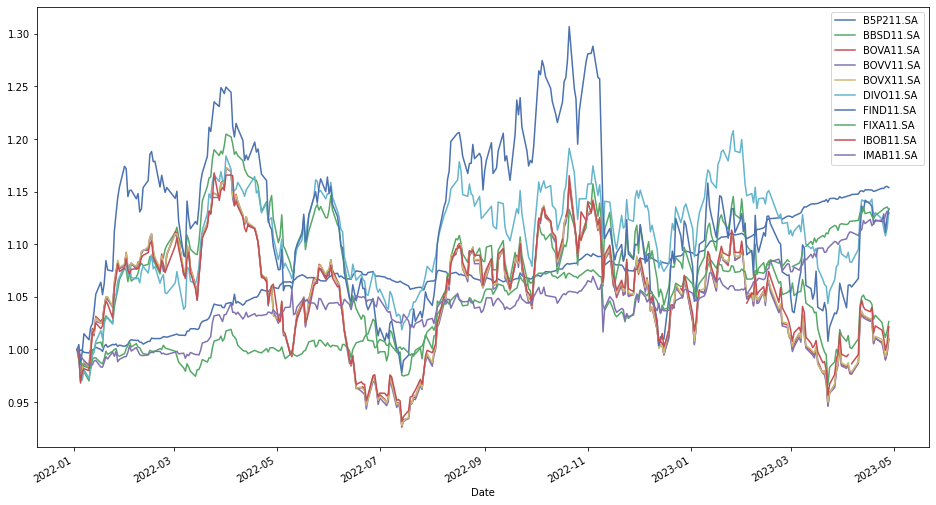

In [34]:
top10_etfs_df_norm.plot(figsize = (16,9));

In [35]:
etfs_norm[top10_etfs]

,B5P211.SA,DIVO11.SA,FIXA11.SA,IMAB11.SA,FIND11.SA,BBSD11.SA,IBOB11.SA,BOVX11.SA,BOVV11.SA,BOVA11.SA
Date,,,,,,,,,,
2022-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2022-01-05,1.000285,0.983086,0.997586,0.996748,0.981531,1.002709,0.972832,0.976767,0.975202,0.975193
2022-01-06,1.000000,0.980082,0.996782,0.994496,0.993396,0.983621,0.983505,0.982575,0.981353,0.982726
2022-01-07,0.998150,0.990357,0.994368,0.992494,1.010298,0.986453,0.986537,0.993224,0.992503,0.991262
2022-01-10,0.997580,0.981663,0.992759,0.987866,1.004589,0.977709,0.984718,0.986447,0.987601,0.988551
...,...,...,...,...,...,...,...,...,...,...
2023-04-25,1.153879,1.125356,1.145615,1.123468,1.123573,1.024754,1.015767,1.005808,1.004229,1.003515
2023-04-26,1.155587,1.118400,1.146420,1.131098,1.106335,1.019458,1.004124,0.997096,0.995482,0.994376
2023-04-27,1.155872,1.125514,1.147224,1.134601,1.120439,1.025370,1.011037,1.002904,1.002403,0.999598


## Quais são os ETFs mais negociados no Brasil, na média? (analise de liquidez)

In [36]:
etfs_norm.columns

Index(['5GTK11.SA', 'ACWI11.SA', 'AGRI11.SA', 'ALUG11.SA', 'B5P211.SA',
       'BAER39.SA', 'BBOV11.SA', 'BBSD11.SA', 'BBUG39.SA', 'BCHI39.SA',
       ...
       'USAL11.SA', 'USDB11.SA', 'USTK11.SA', 'UTEC11.SA', 'WEB311.SA',
       'WRLD11.SA', 'XBOV11.SA', 'XFIX11.SA', 'XINA11.SA', 'YDRO11.SA'],
      dtype='object', length=148)

In [37]:
volumes = yf.download(list(etfs_norm.columns), start = INICIO, end = FIM)['Volume']

[*********************100%***********************]  148 of 148 completed


Limpando os dados faltantes

In [38]:
volumes.isna().sum().sum()

3546

In [39]:
volumes_fill_nan = volumes.ffill(axis = 0)

In [40]:
volumes_fill_nan.isna().sum().sum()

3069

In [41]:
volumes_fill_nan = volumes_fill_nan.drop(volumes_fill_nan.index[0])

In [42]:
volumes_fill_nan.isna().sum().sum()

3027

Media dos volumes (média pode ser enviesada, testar outros métodos depois)

In [43]:
volumes_fill_nan.mean().sort_values(ascending = False)

BOVA11.SA    7.612278e+06
XINA11.SA    1.964219e+06
BOVV11.SA    1.820415e+06
SMAL11.SA    1.328891e+06
BOVX11.SA    1.133342e+06
                 ...     
BIYG39.SA    1.861515e+01
BOEF39.SA    1.483030e+01
BEDC39.SA    9.953488e+00
BSIZ39.SA    2.900000e+00
BHEF39.SA    1.012121e+00
Length: 148, dtype: float64

In [44]:
top10_etfs_volumes = list(volumes_fill_nan.mean().sort_values(ascending = False).head(10).index)

In [45]:
#lista com top 10 etfs por valorização
top10_etfs
#lista com top 10 etfs por volume
top10_etfs_volumes

['BOVA11.SA',
 'XINA11.SA',
 'BOVV11.SA',
 'SMAL11.SA',
 'BOVX11.SA',
 'GOLD11.SA',
 'HASH11.SA',
 'NASD11.SA',
 'IVVB11.SA',
 'USAL11.SA']

In [46]:
volumes_top_10_etfs = volumes[top10_etfs_volumes]

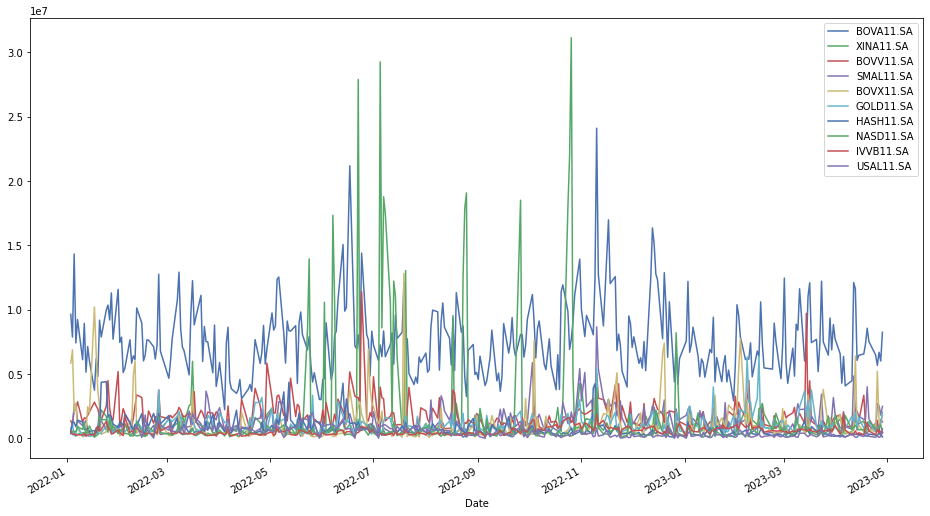

In [47]:
volumes_top_10_etfs.plot(figsize = (16,9));

In [48]:
volumes_top_10_etfs_norm =  volumes_top_10_etfs/volumes_top_10_etfs.iloc[0]

In [49]:
volumes_top_10_etfs_norm.head()

,BOVA11.SA,XINA11.SA,BOVV11.SA,SMAL11.SA,BOVX11.SA,GOLD11.SA,HASH11.SA,NASD11.SA,IVVB11.SA,USAL11.SA
Date,,,,,,,,,,
2022-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
2022-01-04,0.816895,0.883876,0.802163,1.539187,1.177565,1.469590,3.658897,1.135945,0.547711,NaN
2022-01-05,1.487882,0.931947,1.615254,3.786127,0.346786,0.270499,3.443765,1.074105,0.633238,NaN
2022-01-06,0.769232,0.326369,1.641797,4.052088,0.460779,0.437524,2.504282,1.088918,0.433428,NaN
2022-01-07,0.958190,0.606775,2.092502,2.025572,0.130136,1.245500,3.960234,1.816694,0.510651,NaN


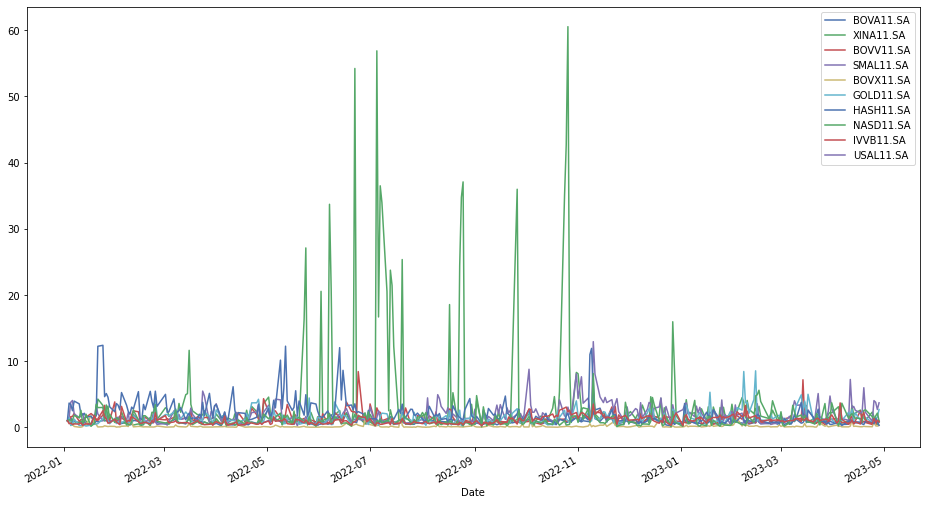

In [50]:
volumes_top_10_etfs_norm.plot(figsize = (16,9));

Há uma distorção pelo volume de negociação do USAL11, o que isso representa?

In [51]:
volumes['USAL11.SA'].head()

Date
2022-01-03   NaN
2022-01-04   NaN
2022-01-05   NaN
2022-01-06   NaN
2022-01-07   NaN
Name: USAL11.SA, dtype: float64

In [52]:
volumes_top_10_etfs_norm.describe()

,BOVA11.SA,XINA11.SA,BOVV11.SA,SMAL11.SA,BOVX11.SA,GOLD11.SA,HASH11.SA,NASD11.SA,IVVB11.SA,USAL11.SA
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,0.0
mean,0.791275,3.809144,1.345061,1.983513,0.196542,1.484491,2.071760,1.210579,1.073717,NaN
std,0.294052,8.308508,0.844310,1.477240,0.271777,1.099203,1.875059,1.001784,0.582945,NaN
min,0.230011,0.153778,0.384381,0.231850,0.010899,0.190303,0.237946,0.069100,0.232666,NaN
25%,0.598557,0.836494,0.851568,1.004000,0.057157,0.785575,0.991052,0.528591,0.641752,NaN
50%,0.757230,1.396531,1.169899,1.552932,0.107019,1.219133,1.515143,0.944787,0.979851,NaN
75%,0.926947,2.497146,1.583512,2.546356,0.196718,1.833298,2.541819,1.581657,1.369588,NaN
max,2.503297,60.531886,8.418241,12.941906,2.194409,8.534703,12.389298,8.111339,3.691010,NaN


Apesar de atípico o baixo volume, foi constatado que realmente o ETF teve baixa negociação neste dia na bolsa em fontes distintas. Há dias próximo de feriados em que os volumes de negociações são pequenos, por isso é importante tomar cuidado com a utilização de volume negociado, e a variação deste indicador dia a dia (mesmo que normalizado, como é este caso). Ainda é possível que exista um viés nos dados. Vamos remover o USAL11 por demonstrar uma altíssima volatilidade no volume transacionado, essa volatilidade pode impactar diretamente o risco dado que isso está diretamente ligado à liquidez do ativo. Neste caso buscamos ativos com alta liquidez e baixa volatilidade no volume negociado.

In [53]:
desempenhos_top10_etfs_volumes = etfs_norm[top10_etfs_volumes]

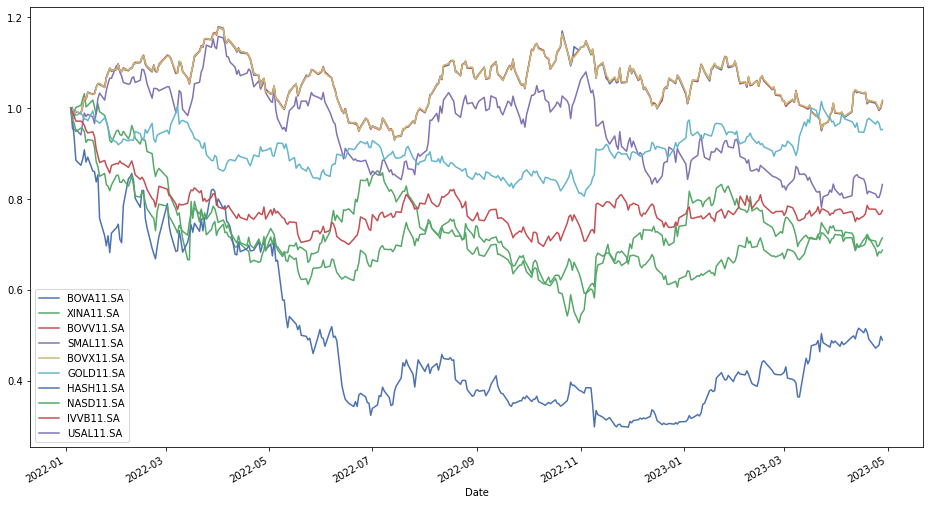

In [54]:
desempenhos_top10_etfs_volumes.plot(figsize=(16,9));

## Removendo ETFs com alta volatilidade

Para encontrar os ETFs com alta volatilidade vamos criar um filtro usando o desvio padrão do volume negociado dos ativos.
Primeiro, será necessário normalizar os dados de volume de todos os ETFs, verificar os valores de minimo e máximo dos dados normalizados e do desvio padrão e assim definir uma faixa aceitável de volatilidade. Além disso é necessário levar em conta o volume negociado (não adianta o ETF ter pouca volatilidade mas baixo volume). Um ETF com baixo volume tem baixa liquidez.

In [55]:
volumes_fill_nan.head()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,NaN,46854,NaN,12471,4663,92,470915,674,NaN,526,...,NaN,NaN,45880,NaN,NaN,11130,25,6564,454762,1142.0
2022-01-05,NaN,50387,NaN,13086,316,0,6786,725,NaN,906,...,NaN,NaN,43195,NaN,NaN,4799,3092,5633,479495,1580.0
2022-01-06,NaN,396243,NaN,3364,2292,12,530346,314,NaN,2172,...,NaN,NaN,30596,NaN,NaN,36404,33,7319,167920,944.0
2022-01-07,NaN,308674,NaN,9643,959,2,2627,258,NaN,921,...,NaN,NaN,31289,NaN,NaN,11023,69,4341,312191,870.0
2022-01-10,NaN,84968,NaN,201117,1894,12686,2879,76,NaN,5846,...,NaN,NaN,33481,NaN,NaN,2878,120,7762,420423,3217.0


In [56]:
volumes_fill_nan_norm = volumes_fill_nan/volumes_fill_nan.iloc[0]

Primeiro vamos verificar se existem aitvos sem desvio padrão (NaN). E remover esses ativos

In [57]:
resumo = volumes_fill_nan_norm.describe()

desvios_padrao = resumo.loc['std']

colunas_com_nan_std = desvios_padrao[desvios_padrao.isna()].index.tolist()

In [58]:
colunas_com_nan_std

['5GTK11.SA',
 'AGRI11.SA',
 'BBUG39.SA',
 'BCHQ39.SA',
 'BCLO39.SA',
 'BCPX39.SA',
 'BCWV39.SA',
 'BDRI39.SA',
 'BDVD39.SA',
 'BEDC39.SA',
 'BEGE39.SA',
 'BEGU39.SA',
 'BEMV39.SA',
 'BEWA39.SA',
 'BFAV39.SA',
 'BFNX39.SA',
 'BHEF39.SA',
 'BHER39.SA',
 'BICL39.SA',
 'BIEV39.SA',
 'BIJR39.SA',
 'BIXG39.SA',
 'BIYE39.SA',
 'BIYG39.SA',
 'BKYY39.SA',
 'BLBT39.SA',
 'BLOK11.SA',
 'BLPA39.SA',
 'BLPX39.SA',
 'BNDX11.SA',
 'BOEF39.SA',
 'BOTZ39.SA',
 'BPVE39.SA',
 'BQYL39.SA',
 'BSDV39.SA',
 'BSIL39.SA',
 'BSIZ39.SA',
 'BSOC39.SA',
 'BURA39.SA',
 'BURT39.SA',
 'BUSM39.SA',
 'CRPT11.SA',
 'DEFI11.SA',
 'ELAS11.SA',
 'FOOD11.SA',
 'META11.SA',
 'NFTS11.SA',
 'QDFI11.SA',
 'SCVB11.SA',
 'SVAL11.SA',
 'URET11.SA',
 'USAL11.SA',
 'USDB11.SA',
 'UTEC11.SA',
 'WEB311.SA']

In [59]:
volumes_fill_nan = volumes_fill_nan.drop(columns=colunas_com_nan_std)

In [60]:
volumes_fill_nan.describe()

,ACWI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BCHI39.SA,BDVY39.SA,BEEM39.SA,BEFG39.SA,...,SPXI11.SA,TECB11.SA,TECK11.SA,TRIG11.SA,USTK11.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
count,3.300000e+02,330.000000,330.000000,330.000000,3.300000e+02,330.000000,3.300000e+02,330.000000,330.000000,330.000000,...,3.300000e+02,330.000000,330.000000,330.000000,3.300000e+02,330.000000,330.000000,330.000000,3.300000e+02,330.000000
mean,2.189182e+05,13215.066667,14982.600000,14768.412121,1.179256e+05,1220.315152,3.587538e+04,26230.748485,14526.233333,7217.800000,...,6.519623e+04,10229.033333,14344.327273,8806.903030,4.345692e+04,12323.809091,1803.324242,23130.863636,1.964219e+06,1738.554545
std,4.602207e+05,48867.411654,40453.235894,38862.635912,2.344675e+05,4193.068785,1.131355e+05,60987.246433,27894.912461,31599.355007,...,1.312625e+05,20207.923811,19928.536298,13767.735745,1.293364e+05,27597.021837,7857.783744,23776.519940,4.280550e+06,3906.353274
min,7.690000e+02,523.000000,2.000000,0.000000,1.500000e+01,19.000000,0.000000e+00,0.000000,0.000000,0.000000,...,1.228000e+03,37.000000,360.000000,98.000000,4.220000e+02,1163.000000,10.000000,1500.000000,7.912000e+04,6.000000
25%,4.836975e+04,2536.750000,2163.000000,2.250000,2.024750e+03,110.250000,1.560250e+03,2483.250000,242.250000,0.000000,...,1.785625e+04,885.750000,2813.250000,2391.500000,4.788750e+03,4091.500000,30.000000,10369.500000,4.297592e+05,218.000000
50%,1.044045e+05,4365.500000,5114.500000,1893.500000,1.421000e+04,229.000000,7.258500e+03,7738.000000,5076.500000,0.000000,...,3.622150e+04,2996.500000,8086.000000,4718.500000,1.067800e+04,6854.000000,69.000000,16956.500000,7.187870e+05,681.000000
75%,2.209608e+05,9203.750000,10843.250000,12558.500000,9.871150e+04,451.500000,2.932925e+04,20757.000000,13325.250000,1186.750000,...,6.612700e+04,10325.250000,16649.000000,9557.750000,2.715300e+04,11194.500000,268.500000,28447.500000,1.285742e+06,1458.250000
max,6.929245e+06,619441.000000,401594.000000,501298.000000,1.729071e+06,39091.000000,1.285404e+06,436550.000000,220525.000000,426574.000000,...,1.367690e+06,158342.000000,158786.000000,147026.000000,1.398548e+06,403410.000000,98025.000000,192044.000000,3.114420e+07,37864.000000


In [61]:
volumes_fill_nan_norm = volumes_fill_nan/volumes_fill_nan.iloc[0]

In [62]:
volumes_fill_nan_norm.describe()

,ACWI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BCHI39.SA,BDVY39.SA,BEEM39.SA,BEFG39.SA,...,SPXI11.SA,TECB11.SA,TECK11.SA,TRIG11.SA,USTK11.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,...,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.00000,330.000000,330.000000,330.000000
mean,4.672349,1.059664,3.213082,160.526219,0.250418,1.810557,68.204154,6.832703,2.297728,1443.560000,...,3.421476,0.962914,0.914059,0.741010,0.947187,1.107260,72.13297,3.523898,4.319223,1.522377
std,9.822443,3.918484,8.675367,422.419956,0.497898,6.221170,215.086475,15.886232,4.412356,6319.871001,...,6.888613,1.902280,1.269900,1.158413,2.819014,2.479517,314.31135,3.622261,9.412726,3.420625
min,0.016413,0.041937,0.000429,0.000000,0.000032,0.028190,0.000000,0.000000,0.000000,0.000000,...,0.064445,0.003483,0.022940,0.008246,0.009198,0.104492,0.40000,0.228519,0.173981,0.005254
25%,1.032350,0.203412,0.463864,0.024457,0.004300,0.163576,2.966255,0.646848,0.038319,0.000000,...,0.937090,0.083380,0.179268,0.201220,0.104376,0.367610,1.20000,1.579753,0.945020,0.190893
50%,2.228294,0.350052,1.096826,20.581522,0.030175,0.339763,13.799430,2.015629,0.802990,0.000000,...,1.900892,0.282077,0.515262,0.397013,0.232738,0.615813,2.76000,2.583257,1.580578,0.596322
75%,4.715942,0.738012,2.325381,136.505435,0.209616,0.669881,55.759030,5.406877,2.107759,237.350000,...,3.470323,0.971971,1.060919,0.804186,0.591827,1.005795,10.74000,4.333867,2.827287,1.276926
max,147.890148,49.670516,86.123526,5448.891304,3.671726,57.998516,2443.733840,113.714509,34.882158,85314.800000,...,71.775912,14.905582,10.118269,12.370719,30.482738,36.245283,3921.00000,29.257160,68.484614,33.155867


Agora vamos ordenar a lista pelos desvios padrões. Note que não pode aparecer mais ativos NaN no final da lista.

In [63]:
volumes_fill_nan_norm.describe().loc['std'].sort_values(ascending = False)

BEFG39.SA    6319.871001
BEWQ39.SA    2543.579948
BIGF39.SA     810.903815
BEZU39.SA     527.760809
BXTC39.SA     511.617245
                ...     
BBOV11.SA       0.497898
QETH11.SA       0.459678
BOVA11.SA       0.360233
EURP11.SA       0.307919
BOVX11.SA       0.228055
Name: std, Length: 93, dtype: float64

Para avançar na análise precisamos definir qual faixa de desvio padrão é aceitável na nossa lista.
A faixa de desvio padrão aceitável para a volatilidade de um ativo com base em seu volume de negociação pode variar dependendo dos objetivos e das estratégias de investimento de cada investidor. Não existe uma faixa única e universalmente aceitável, pois a tolerância à volatilidade varia de pessoa para pessoa.
No entanto, os investidores geralmente consideram algumas diretrizes gerais ao avaliar a volatilidade com base no volume de negociação de um ativo:
- **Volatilidade Histórica**: É comum olhar para a volatilidade histórica do ativo, que é calculada com base nos preços passados do ativo. O desvio padrão dos retornos diários é um indicador comum de volatilidade histórica. A faixa aceitável pode depender do tipo de ativo (por exemplo, ações, títulos, moedas) e das preferências de risco do investidor.

- **Comparação com o Mercado**: Os investidores muitas vezes comparam a volatilidade de um ativo com a volatilidade do mercado em geral. Se um ativo é muito mais volátil do que o mercado de referência, isso pode ser visto como arriscado.

- **Objetivos de Investimento**: Os objetivos de investimento de um indivíduo desempenham um papel importante na determinação da faixa aceitável de volatilidade. Por exemplo, investidores de longo prazo podem ser mais tolerantes à volatilidade do que traders de curto prazo.

- **Diversificação**: A diversificação de portfólio pode ajudar a reduzir o risco global. Portanto, mesmo se um ativo individual for volátil, a inclusão em um portfólio diversificado pode ser aceitável.

Para quantificar estes conceitos, vamos utilizar o cálculo do beta (que mede a sensibilidade de um ativo em relação ao mercado).

## O que é o beta?
O beta é uma medida de sensibilidade de um ativo financeiro (como uma ação) em relação a movimentos no mercado mais amplo, geralmente representado pelo índice de referência, como o índice S&P 500. Ele ajuda a quantificar o risco sistemático associado a um ativo em comparação com o mercado em geral.

O cálculo do beta envolve os seguintes passos:

- **Coleta de Dados**: Você precisará dos dados de preço histórico do ativo em questão e do índice de referência (por exemplo, o S&P 500) para o mesmo período de tempo. Normalmente, você obtém dados diários de preço de fechamento.

- **Cálculo dos Retornos**: Calcule os retornos diários para o ativo e o índice. O retorno diário é a variação percentual no preço de fechamento em relação ao dia anterior. 

- **Cálculo da Covariância**: Calcule a covariância entre os retornos do ativo e os retornos do índice. A covariância mede como os retornos do ativo e do índice variam juntos.

- **Cálculo da Variância do Índice**: Calcule a variância dos retornos do índice. A variância mede a dispersão dos retornos do índice em relação à sua média.

- **Cálculo do Beta**: O beta é calculado dividindo a covariância pelo quadrado da variância do índice. Beta = Covariância / Variância do Índice

O beta resultante indica a sensibilidade do ativo em relação ao mercado. Se o beta for maior que 1, o ativo é mais volátil do que o mercado. Se for menor que 1, o ativo é menos volátil. Se for igual a 1, o ativo tem a mesma volatilidade do mercado.

- **Beta Igual a 1**: Se o beta de um ativo for exatamente igual a 1, isso significa que o ativo historicamente teve uma volatilidade em linha com o mercado. Ele tende a seguir as flutuações do mercado, e seus retornos são esperados para serem tão voláteis quanto o mercado em geral.

- **Beta Maior que 1**: Se o beta for maior que 1 (por exemplo, 1,2), isso indica que o ativo é mais volátil do que o mercado. Isso significa que, historicamente, o ativo teve movimentos mais amplos em relação ao mercado. É considerado mais arriscado do que o mercado em geral.

- **Beta Menor que 1**: Se o beta for menor que 1 (por exemplo, 0,8), isso indica que o ativo é menos volátil do que o mercado. Historicamente, seus movimentos são mais suaves em comparação com o mercado. É considerado menos arriscado do que o mercado em geral.

- **Beta Negativo**: Um beta negativo (por exemplo, -0,5) indica que o ativo tende a mover-se na direção oposta ao mercado. Isso significa que, quando o mercado sobe, esse ativo tende a cair e vice-versa.

In [64]:
volumes_fill_nan.head()

,ACWI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BCHI39.SA,BDVY39.SA,BEEM39.SA,BEFG39.SA,...,SPXI11.SA,TECB11.SA,TECK11.SA,TRIG11.SA,USTK11.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,46854,12471,4663,92,470915,674,526,3839,6322,5,...,19055,10623,15693,11885,45880,11130,25,6564,454762,1142.0
2022-01-05,50387,13086,316,0,6786,725,906,1140,3054,0,...,17333,2563,158786,20721,43195,4799,3092,5633,479495,1580.0
2022-01-06,396243,3364,2292,12,530346,314,2172,640,12724,201,...,16990,3581,25043,25487,30596,36404,33,7319,167920,944.0
2022-01-07,308674,9643,959,2,2627,258,921,27040,786,24089,...,14257,3312,15054,18561,31289,11023,69,4341,312191,870.0
2022-01-10,84968,201117,1894,12686,2879,76,5846,1735,2850,0,...,42433,1402,15393,18975,33481,2878,120,7762,420423,3217.0


In [65]:
ibovespa = yf.download('^BVSP',start = INICIO, end = FIM)['Close']

[*********************100%***********************]  1 of 1 completed


In [66]:
ibovespa = pd.DataFrame(ibovespa)

In [67]:
ibovespa.head()

,Close
Date,
2022-01-03,103922.0
2022-01-04,103514.0
2022-01-05,101006.0
2022-01-06,101561.0
2022-01-07,102719.0


In [68]:
ibovespa.describe()

,Close
count,331.000000
mean,108814.758308
std,5498.777376
min,96121.000000
25%,104414.500000
50%,109442.000000
75%,112473.500000
max,121570.000000


In [69]:
ibovespa.isna().sum().sum()

0

Lembrando que para calcular o Beta, precisamos calcular com base no preço dos ativos, e nao do volume

In [70]:
etfs_retornos = etfs_limpos.pct_change()
ibovespa_retornos = ibovespa.pct_change()

In [71]:
etfs_retornos.head()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05 00:00:00,NaN,-0.009748,NaN,-0.023338,0.000285,0.000000,-0.026494,0.002709,NaN,-0.015096,...,NaN,NaN,-0.028936,NaN,NaN,-0.012238,-0.023462,-0.009100,-0.015169,-0.032550
2022-01-06 00:00:00,NaN,-0.007383,NaN,-0.005020,-0.000285,0.012012,0.007720,-0.019037,NaN,0.007664,...,NaN,NaN,-0.008764,NaN,NaN,-0.006481,0.004947,-0.002041,0.007109,0.003364
2022-01-07 00:00:00,NaN,-0.012397,NaN,-0.014127,-0.001850,-0.002967,0.006512,0.002880,NaN,0.004840,...,NaN,NaN,-0.014147,NaN,NaN,-0.010072,0.011150,0.001023,0.009412,-0.004098
2022-01-10 00:00:00,NaN,0.004184,NaN,-0.001228,-0.000570,-0.012897,-0.006660,-0.008864,NaN,0.009862,...,NaN,NaN,-0.000897,NaN,NaN,0.002810,-0.007352,-0.003064,0.004662,-0.013281


In [72]:
beta = pd.DataFrame(columns=['Ativo', 'Beta'])

for coluna in etfs_retornos.columns:

    ativo_especifico_retornos = etfs_retornos[coluna]
    ativo_especifico_retornos = pd.DataFrame(ativo_especifico_retornos)
    

    covariancia = ativo_especifico_retornos[coluna].cov(ibovespa_retornos['Close'])
    

    variancia_indice = ibovespa_retornos['Close'].var()
    

    beta_calculado = covariancia / variancia_indice
    

    beta = beta.append({'Ativo': coluna, 'Beta': beta_calculado}, ignore_index=True)



In [73]:
beta.head()

,Ativo,Beta
0,5GTK11.SA,-0.107656
1,ACWI11.SA,-0.127885
2,AGRI11.SA,0.807888
3,ALUG11.SA,-0.185432
4,B5P211.SA,0.037384


In [74]:
beta.set_index('Ativo', inplace=True)

In [75]:
beta = beta.astype(float)

In [76]:
beta.describe()

,Beta
count,148.000000
mean,0.159416
std,0.444241
min,-0.760715
25%,-0.119541
50%,-0.014319
75%,0.361518
max,1.305158


Voltando ao significado do Beta:
- **Beta Igual a 1**: Se o beta de um ativo for exatamente igual a 1, isso significa que o ativo historicamente teve uma volatilidade em linha com o mercado. Ele tende a seguir as flutuações do mercado, e seus retornos são esperados para serem tão voláteis quanto o mercado em geral.

- **Beta Maior que 1**: Se o beta for maior que 1 (por exemplo, 1,2), isso indica que o ativo é mais volátil do que o mercado. Isso significa que, historicamente, o ativo teve movimentos mais amplos em relação ao mercado. É considerado mais arriscado do que o mercado em geral.

- **Beta Menor que 1**: Se o beta for menor que 1 (por exemplo, 0,8), isso indica que o ativo é menos volátil do que o mercado. Historicamente, seus movimentos são mais suaves em comparação com o mercado. É considerado menos arriscado do que o mercado em geral.

- **Beta Negativo**: Um beta negativo (por exemplo, -0,5) indica que o ativo tende a mover-se na direção oposta ao mercado. Isso significa que, quando o mercado sobe, esse ativo tende a cair e vice-versa.

## Filtro Beta
- **Não queremos**: Beta Negativo, Beta MUITO Maior que 1 (2 por exemplo)
- **Queremos**: Beta Maior ou igual a 1, Beta Menor que 1 (ideal, baixa volatilidade)

In [77]:
beta.loc[beta.index.isin(desempenhos_top10_etfs_volumes),'Beta']

Ativo
BOVA11.SA    1.019445
BOVV11.SA    1.005660
BOVX11.SA    1.000170
GOLD11.SA   -0.401579
HASH11.SA    0.431294
IVVB11.SA   -0.123726
NASD11.SA   -0.081879
SMAL11.SA    1.126384
USAL11.SA   -0.127210
XINA11.SA   -0.001308
Name: Beta, dtype: float64

In [78]:
beta.sort_values('Beta', ascending=False)

,Beta
Ativo,
SCVB11.SA,1.305158
TRIG11.SA,1.156864
SMAL11.SA,1.126384
SMAC11.SA,1.122771
TECB11.SA,1.097418
...,...
BDVD39.SA,-0.375228
BIAU39.SA,-0.387248
GOLD11.SA,-0.401579


In [79]:
beta_positivo = beta[beta['Beta'] > 0]
beta_abaixo_de_2 = beta_positivo[beta_positivo['Beta'] < 2]

In [80]:
beta_ideal = beta_abaixo_de_2.sort_values('Beta', ascending=False)

In [81]:
beta_ideal.head()

,Beta
Ativo,
SCVB11.SA,1.305158
TRIG11.SA,1.156864
SMAL11.SA,1.126384
SMAC11.SA,1.122771
TECB11.SA,1.097418


In [82]:
beta_ideal_top20 = list(beta_ideal.head(20).index)

In [83]:
beta_ideal_top20

['SCVB11.SA',
 'TRIG11.SA',
 'SMAL11.SA',
 'SMAC11.SA',
 'TECB11.SA',
 'ELAS11.SA',
 'FIND11.SA',
 'BBOV11.SA',
 'BOVA11.SA',
 'PIBB11.SA',
 'BOVV11.SA',
 'BOVX11.SA',
 'GOVE11.SA',
 'BOVB11.SA',
 'BOVS11.SA',
 'BRAX11.SA',
 'XBOV11.SA',
 'SMAB11.SA',
 'ISUS11.SA',
 'ECOO11.SA']

In [84]:
beta.loc[beta.index.isin(['ECOO11.SA']),'Beta']

Ativo
ECOO11.SA    0.952516
Name: Beta, dtype: float64

## Voltando à analise de volatilidade pelo volume

In [97]:
valores = beta_ideal_top20
erros = []

for valor in valores:
    try:
        resultado = volumes_fill_nan_norm[valor].describe()
        print(resultado)
    except KeyError:
        print(f"O valor {valor} não está presente no índice e será ignorado.")
        erros.append(valor)

O valor SCVB11.SA não está presente no índice e será ignorado.
count    330.000000
mean       0.741010
std        1.158413
min        0.008246
25%        0.201220
50%        0.397013
75%        0.804186
max       12.370719
Name: TRIG11.SA, dtype: float64
count    330.000000
mean       1.290612
std        0.960563
min        0.150631
25%        0.652905
50%        1.012996
75%        1.660160
max        8.408275
Name: SMAL11.SA, dtype: float64
count    330.000000
mean       2.986728
std        3.594294
min        0.030182
25%        0.798293
50%        1.854264
75%        3.557234
max       22.243186
Name: SMAC11.SA, dtype: float64
count    330.000000
mean       0.962914
std        1.902280
min        0.003483
25%        0.083380
50%        0.282077
75%        0.971971
max       14.905582
Name: TECB11.SA, dtype: float64
O valor ELAS11.SA não está presente no índice e será ignorado.
count    330.000000
mean       1.225529
std        1.947168
min        0.000445
25%        0.093112
50%   

In [98]:
erros

['SCVB11.SA', 'ELAS11.SA']

In [86]:
etfs_norm[beta_ideal_top20].describe()

,SCVB11.SA,TRIG11.SA,SMAL11.SA,SMAC11.SA,TECB11.SA,ELAS11.SA,FIND11.SA,BBOV11.SA,BOVA11.SA,PIBB11.SA,BOVV11.SA,BOVX11.SA,GOVE11.SA,BOVB11.SA,BOVS11.SA,BRAX11.SA,XBOV11.SA,SMAB11.SA,ISUS11.SA,ECOO11.SA
count,0.0,330.000000,330.000000,330.000000,330.000000,0.0,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,NaN,0.904675,0.955230,0.954085,0.688595,NaN,1.116743,1.052656,1.055305,1.055322,1.055826,1.056012,1.049357,1.053234,1.051446,1.054350,1.052952,0.957535,0.954927,1.009022
std,NaN,0.097555,0.088101,0.086988,0.140948,NaN,0.070309,0.052390,0.052952,0.055416,0.053115,0.052823,0.056067,0.052909,0.052483,0.053389,0.052219,0.087776,0.079917,0.063647
min,NaN,0.718529,0.781308,0.786225,0.520690,NaN,0.973808,0.927095,0.929497,0.919978,0.933103,0.931268,0.926604,0.929369,0.929279,0.932757,0.931388,0.787654,0.790737,0.869129
25%,NaN,0.821646,0.878972,0.875402,0.579957,NaN,1.059408,1.013435,1.015994,1.015400,1.016700,1.016457,1.003141,1.013737,1.010439,1.014245,1.012692,0.879321,0.889579,0.953677
50%,NaN,0.929998,0.968224,0.965832,0.637931,NaN,1.114954,1.059188,1.062167,1.061820,1.062668,1.063408,1.053890,1.060479,1.059310,1.058997,1.060528,0.969136,0.969359,1.004805
75%,NaN,0.982347,1.023435,1.022540,0.745259,NaN,1.166751,1.088876,1.090414,1.095477,1.092296,1.092691,1.088219,1.089131,1.086991,1.090398,1.088846,1.028395,1.017086,1.064302
max,NaN,1.115169,1.157477,1.161002,1.027586,NaN,1.300649,1.170988,1.177061,1.176582,1.178874,1.177154,1.179193,1.174365,1.171536,1.177739,1.172713,1.169136,1.135273,1.145881


Apesar da alta volatilidade do TRIG11.SA, este ativo já passou por alguns crivos e limpezas, portanto vamos mantê-lo.


In [103]:
beta_ideal_top20 = [elemento for elemento in beta_ideal_top20 if elemento not in erros]

In [104]:
top12_etfs_by_volume_beta = list(volumes_fill_nan_norm[beta_ideal_top20].mean().sort_values(ascending = False).head(8).index)

In [105]:
top8_etfs_by_volume_beta_preco = list(etfs_limpos[top12_etfs_by_volume_beta].mean().sort_values(ascending = False).head(8).index)

In [106]:
top8_etfs_by_volume_beta_preco

['PIBB11.SA',
 'BOVV11.SA',
 'XBOV11.SA',
 'BRAX11.SA',
 'BOVS11.SA',
 'SMAC11.SA',
 'GOVE11.SA',
 'ISUS11.SA']

## Plotando o desempenho

In [107]:
desempenhos_top8_etfs = etfs_norm[top8_etfs_by_volume_beta_preco]

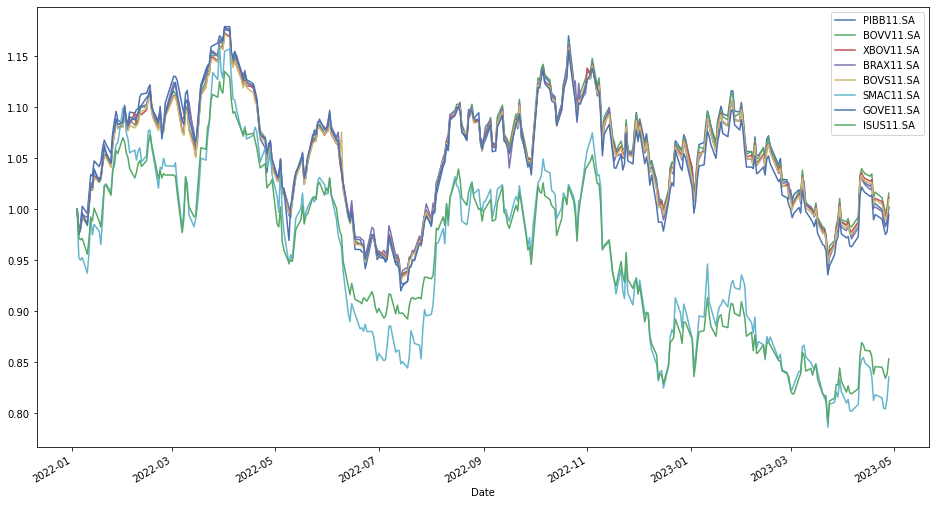

In [108]:
desempenhos_top8_etfs.plot(figsize=(16,9));

# TODO

#### TODO: simular uma carteira com ETFs e outros ativos e fazer o backtest com a vectorbt, tentar ver o nível de risco da carteira com e sem ETFs

In [109]:
ativos_etfs = list(desempenhos_top8_etfs.mean().sort_values(ascending = False).index)

Critério de seleção de ações: Ativos da carteira recomendada do Valor Economico

Fonte de dados: https://infograficos.valor.globo.com/carteira-valor/historico/9/2023


In [110]:
url = 'https://infograficos.valor.globo.com/carteira-valor/historico/9/2023'

In [111]:
soup = BeautifulSoup(url, 'html.parser')

In [112]:
df_ativos = pd.read_html(str(soup), encoding='utf-8')[0]

In [113]:
df_ativos.drop(df_ativos.index[10], inplace=True)

In [114]:
df_ativos

,NomeNome/Código,Código,Indicações,Variação no mêsVar. Mês
0,VALE ONVALE3,VALE3,5,"+3,84%"
1,GERDAU PNGGBR4,GGBR4,5,"-6,65%"
2,BTGP BANCO UNTBPAC11,BPAC11,4,"-4,31%"
3,BB SEGURIDADE ONBBSE3,BBSE3,4,"+2,73%"
4,ITAÚ UNIBANCO PNITUB4,ITUB4,3,"+0,09%"
5,PETRO RIO ONPRIO3,PRIO3,3,"+1,34%"
6,WEG ONWEGE3,WEGE3,3,"+1,24%"
7,JBS ONJBSS3,JBSS3,3,"-1,90%"
8,MULTIPLAN ONMULT3,MULT3,3,"+0,05%"
9,COPEL PNBCPLE6,CPLE6,3,"+3,46%"


In [115]:
df_ativos.set_index('Código', inplace=True)

In [116]:
list(df_ativos.index)

['VALE3',
 'GGBR4',
 'BPAC11',
 'BBSE3',
 'ITUB4',
 'PRIO3',
 'WEGE3',
 'JBSS3',
 'MULT3',
 'CPLE6']

In [117]:
ativos_acoes = [i + '.SA' for i in list(df_ativos.index)]

In [118]:
ativos = ativos_acoes + ativos_etfs

In [119]:
ativos

['VALE3.SA',
 'GGBR4.SA',
 'BPAC11.SA',
 'BBSE3.SA',
 'ITUB4.SA',
 'PRIO3.SA',
 'WEGE3.SA',
 'JBSS3.SA',
 'MULT3.SA',
 'CPLE6.SA',
 'BOVV11.SA',
 'PIBB11.SA',
 'BRAX11.SA',
 'XBOV11.SA',
 'BOVS11.SA',
 'GOVE11.SA',
 'ISUS11.SA',
 'SMAC11.SA']

Vamos dividir o dataset em 2, para fazer uma análise de out of samples

In [120]:
portfolio_value = 20000

In [121]:
carteira_etf_acoes = yf.download(ativos ,start = INICIO, end=FIM)['Adj Close']
carteira_etf_acoes = carteira_etf_acoes.dropna()
carteira_etf_acoes.head()

[*********************100%***********************]  18 of 18 completed


,BBSE3.SA,BOVS11.SA,BOVV11.SA,BPAC11.SA,BRAX11.SA,CPLE6.SA,GGBR4.SA,GOVE11.SA,ISUS11.SA,ITUB4.SA,JBSS3.SA,MULT3.SA,PIBB11.SA,PRIO3.SA,SMAC11.SA,VALE3.SA,WEGE3.SA,XBOV11.SA
Date,,,,,,,,,,,,,,,,,,
2022-01-03,17.254553,80.050003,104.629997,19.155977,87.360001,5.730652,21.794008,46.200001,35.919998,19.932753,32.180717,16.406160,180.649994,20.290001,57.220001,67.600021,31.017479,101.830002
2022-01-04,17.212673,79.750000,104.040001,18.718018,86.699997,5.668266,22.097815,45.369999,35.410000,20.498028,32.083332,16.330948,180.199997,20.719999,55.900002,66.802681,30.862490,101.440002
2022-01-05,17.003271,77.820000,101.459999,17.908745,85.059998,5.596967,21.730053,44.230000,34.430000,20.108816,32.012512,15.682222,176.250000,18.490000,53.230000,67.435349,29.235086,99.059998
2022-01-06,17.120539,78.260002,102.099998,17.714243,85.199997,5.454369,21.738047,44.500000,34.349998,20.516556,32.030220,15.691624,177.759995,18.959999,53.119999,68.796013,29.225401,99.550003
2022-01-07,16.584473,79.169998,103.260002,17.848589,86.250000,5.436544,21.929924,45.209999,34.400002,20.970625,31.198036,15.663415,180.740005,19.820000,53.250000,72.800026,28.489199,100.660004


In [122]:
#out of samples
df_out = yf.download(ativos, start='2023-05-02')['Adj Close']
df_out = df_out.dropna()
df_out.tail()

[*********************100%***********************]  18 of 18 completed


,BBSE3.SA,BOVS11.SA,BOVV11.SA,BPAC11.SA,BRAX11.SA,CPLE6.SA,GGBR4.SA,GOVE11.SA,ISUS11.SA,ITUB4.SA,JBSS3.SA,MULT3.SA,PIBB11.SA,PRIO3.SA,SMAC11.SA,VALE3.SA,WEGE3.SA,XBOV11.SA
Date,,,,,,,,,,,,,,,,,,
2023-09-25,32.029999,89.309998,117.879997,30.900000,96.410004,9.11,24.400000,50.580002,33.270000,27.000000,18.110001,24.253443,201.940002,46.980000,52.990002,66.599998,36.130001,113.739998
2023-09-26,31.830000,88.000000,116.010002,30.209999,95.190002,8.98,24.430000,49.900002,32.779999,26.600000,17.840000,23.584110,198.320007,46.930000,52.119999,65.559998,36.080002,112.059998
2023-09-27,31.469999,88.089996,116.199997,29.889999,94.989998,8.72,24.450001,49.959999,32.520000,26.549999,17.670000,23.683945,195.000000,48.299999,51.930000,65.699997,36.020000,112.180000
2023-09-28,31.700001,89.160004,117.720001,30.719999,96.300003,8.93,24.299999,50.599998,32.970001,27.250000,17.780001,24.150000,201.410004,47.240002,52.810001,66.699997,36.389999,113.540001
2023-09-29,31.209999,89.800003,118.550003,31.070000,96.730003,8.96,24.129999,50.970001,33.150002,27.209999,18.049999,24.570000,202.699997,47.040001,53.439999,67.580002,36.270000,114.349998


Para determinar os pesos de cada ativo na carteira, vamos usar o método da fronteira eficiente de Markowitz.

## Fronteira Eficiente - Markowitz

In [123]:
mean = expected_returns.mean_historical_return(carteira_etf_acoes)

s = CovarianceShrinkage(carteira_etf_acoes).ledoit_wolf()

In [124]:
corr = s.corr()
corr.style.background_gradient(cmap='coolwarm', axis = None).format(precision=2)

,BBSE3.SA,BOVS11.SA,BOVV11.SA,BPAC11.SA,BRAX11.SA,CPLE6.SA,GGBR4.SA,GOVE11.SA,ISUS11.SA,ITUB4.SA,JBSS3.SA,MULT3.SA,PIBB11.SA,PRIO3.SA,SMAC11.SA,VALE3.SA,WEGE3.SA,XBOV11.SA
BBSE3.SA,1.00,-0.20,-0.25,0.21,-0.28,0.04,-0.38,-0.20,0.14,-0.02,-0.18,0.22,-0.36,-0.21,0.14,-0.53,0.06,-0.22
BOVS11.SA,-0.20,1.00,0.99,0.78,0.95,0.05,0.08,0.98,0.78,0.64,-0.31,0.62,0.93,0.31,0.82,0.04,0.26,0.99
BOVV11.SA,-0.25,0.99,1.00,0.74,0.97,0.03,0.15,0.98,0.74,0.61,-0.31,0.59,0.96,0.33,0.78,0.11,0.25,0.99
BPAC11.SA,0.21,0.78,0.74,1.00,0.65,0.27,-0.36,0.74,0.92,0.66,-0.05,0.79,0.56,-0.13,0.90,-0.44,0.31,0.74
BRAX11.SA,-0.28,0.95,0.97,0.65,1.00,-0.05,0.26,0.96,0.62,0.51,-0.30,0.47,0.97,0.43,0.68,0.25,0.18,0.97
CPLE6.SA,0.04,0.05,0.03,0.27,-0.05,1.00,-0.34,0.03,0.39,0.14,-0.01,0.40,-0.14,-0.11,0.32,-0.49,-0.07,0.02
GGBR4.SA,-0.38,0.08,0.15,-0.36,0.26,-0.34,1.00,0.08,-0.43,-0.30,-0.13,-0.48,0.36,0.32,-0.34,0.85,0.02,0.15
GOVE11.SA,-0.20,0.98,0.98,0.74,0.96,0.03,0.08,1.00,0.75,0.58,-0.33,0.62,0.94,0.37,0.80,0.07,0.23,0.98
ISUS11.SA,0.14,0.78,0.74,0.92,0.62,0.39,-0.43,0.75,1.00,0.68,-0.16,0.91,0.53,-0.06,0.98,-0.55,0.32,0.73
ITUB4.SA,-0.02,0.64,0.61,0.66,0.51,0.14,-0.30,0.58,0.68,1.00,-0.28,0.63,0.49,-0.01,0.62,-0.38,0.07,0.60


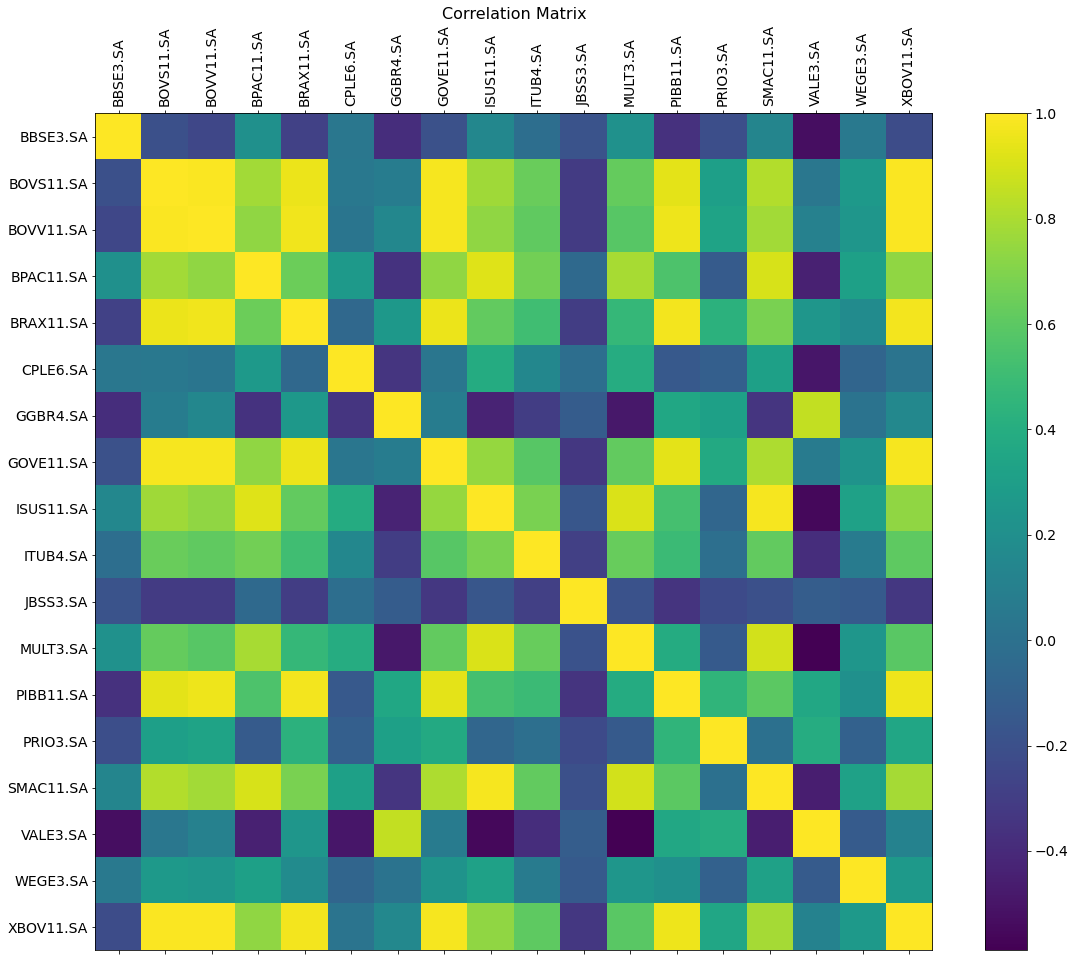

In [125]:
f = plt.figure(figsize=(19, 15))
plt.matshow(s.corr(), fignum=f.number)
plt.xticks(range(s.select_dtypes(['number']).shape[1]), s.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(s.select_dtypes(['number']).shape[1]), s.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [126]:
exp_return = expected_returns.mean_historical_return(carteira_etf_acoes)
exp_return

BBSE3.SA     0.628534
BOVS11.SA    0.004303
BOVV11.SA    0.007751
BPAC11.SA    0.155519
BRAX11.SA   -0.004738
CPLE6.SA     0.293621
GGBR4.SA     0.084830
GOVE11.SA   -0.017788
ISUS11.SA   -0.124188
ITUB4.SA     0.202150
JBSS3.SA    -0.388106
MULT3.SA     0.391978
PIBB11.SA    0.000212
PRIO3.SA     0.510022
SMAC11.SA   -0.144108
VALE3.SA     0.030225
WEGE3.SA     0.234350
XBOV11.SA    0.006087
dtype: float64

Nota da documentação da biblioteca [Pyportfolioopt](https://pyportfolioopt.readthedocs.io/en/latest/MeanVariance.html?highlight=gamma#:~:text=Note-,In%20practice%2C,.,-References):
- In practice, γ must be tuned to achieve the level of regularisation that you want. However, if the universe of assets is small (less than 20 assets), then gamma=1 is a good starting point. For larger universes, or if you want more non-negligible weights in the final portfolio, increase gamma. 

In [127]:
#Sharp ratio

ef = EfficientFrontier(mean, s)

ef.add_objective(objective_functions.L2_reg, gamma = 1)

w = ef.max_sharpe()

cleaned_weights  = ef.clean_weights()
cleaned_weights_ = cleaned_weights.values()
cleaned_weights_ = list(cleaned_weights_)
cleaned_weights_ = np.array(cleaned_weights_)

print(cleaned_weights)

OrderedDict([('BBSE3.SA', 0.31673), ('BOVS11.SA', 0.0), ('BOVV11.SA', 0.0), ('BPAC11.SA', 0.02347), ('BRAX11.SA', 0.0), ('CPLE6.SA', 0.11897), ('GGBR4.SA', 0.00502), ('GOVE11.SA', 0.0), ('ISUS11.SA', 0.0), ('ITUB4.SA', 0.07138), ('JBSS3.SA', 0.0), ('MULT3.SA', 0.16318), ('PIBB11.SA', 0.0), ('PRIO3.SA', 0.21535), ('SMAC11.SA', 0.0), ('VALE3.SA', 0.0), ('WEGE3.SA', 0.08589), ('XBOV11.SA', 0.0)])


In [128]:
ef.portfolio_performance(verbose=True)

Expected annual return: 44.6%
Annual volatility: 21.5%
Sharpe Ratio: 1.98


(0.4464424016808828, 0.2154314203546266, 1.9794809920433434)

In [129]:
latest_prices = get_latest_prices(carteira_etf_acoes)
da = DiscreteAllocation(w, latest_prices, total_portfolio_value=portfolio_value)
allocation, leftover = da.lp_portfolio()
print('Qtd ações alocadas: ',allocation)
print('Sobrou: R$',leftover)

Qtd ações alocadas:  {'BBSE3.SA': 194, 'BPAC11.SA': 20, 'CPLE6.SA': 297, 'GGBR4.SA': 4, 'ITUB4.SA': 57, 'MULT3.SA': 129, 'PRIO3.SA': 124, 'WEGE3.SA': 42}
Sobrou: R$ 3.1143169712886447


In [130]:
allocation_df = pd.DataFrame.from_dict(allocation, orient='index', columns=['Quantidade']).sort_values(by='Quantidade', ascending=False).reset_index().set_index('index')

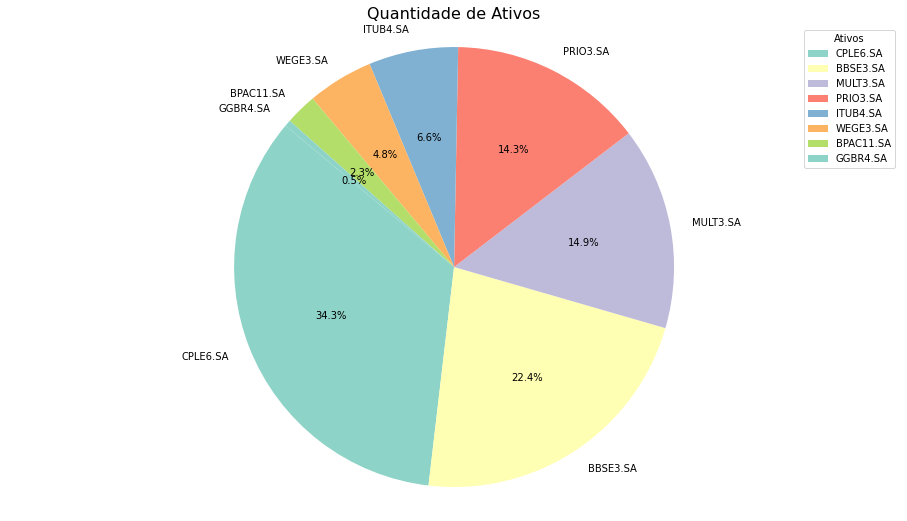

In [131]:
plt.figure(figsize=(16, 9), facecolor='white')

cores = sns.color_palette('Set3', n_colors=7)
plt.pie(allocation_df['Quantidade'], labels=allocation_df.index, autopct='%1.1f%%', startangle=140, colors=cores)

plt.axis('equal') 

plt.title('Quantidade de Ativos', fontsize=16)
plt.legend(allocation_df.index, title="Ativos", loc="best")


plt.show()

In [132]:
mean_2 = expected_returns.mean_historical_return(df_out)

s_2 = CovarianceShrinkage(df_out).ledoit_wolf()

In [133]:
corr_2 = s_2.corr()
corr_2.style.background_gradient(cmap='coolwarm', axis = None).format(precision=2)

,BBSE3.SA,BOVS11.SA,BOVV11.SA,BPAC11.SA,BRAX11.SA,CPLE6.SA,GGBR4.SA,GOVE11.SA,ISUS11.SA,ITUB4.SA,JBSS3.SA,MULT3.SA,PIBB11.SA,PRIO3.SA,SMAC11.SA,VALE3.SA,WEGE3.SA,XBOV11.SA
BBSE3.SA,1.00,-0.50,-0.50,-0.15,-0.48,0.02,-0.29,-0.53,-0.52,-0.11,-0.47,-0.34,-0.46,-0.03,-0.50,-0.26,0.00,-0.42
BOVS11.SA,-0.50,1.00,0.97,0.69,0.95,-0.22,0.41,0.97,0.74,0.72,0.03,0.29,0.96,0.02,0.81,0.53,-0.53,0.84
BOVV11.SA,-0.50,0.97,1.00,0.68,0.95,-0.21,0.41,0.96,0.74,0.73,0.07,0.28,0.96,-0.02,0.81,0.53,-0.56,0.83
BPAC11.SA,-0.15,0.69,0.68,1.00,0.66,-0.01,-0.03,0.71,0.70,0.70,-0.00,0.40,0.66,0.09,0.68,0.05,-0.37,0.70
BRAX11.SA,-0.48,0.95,0.95,0.66,1.00,-0.24,0.42,0.95,0.69,0.69,-0.01,0.26,0.94,-0.02,0.77,0.56,-0.52,0.81
CPLE6.SA,0.02,-0.22,-0.21,-0.01,-0.24,1.00,-0.53,-0.23,0.13,-0.02,0.10,0.25,-0.15,-0.48,-0.04,-0.46,-0.14,-0.14
GGBR4.SA,-0.29,0.41,0.41,-0.03,0.42,-0.53,1.00,0.41,-0.06,0.01,-0.05,-0.42,0.38,0.29,0.09,0.79,-0.08,0.21
GOVE11.SA,-0.53,0.97,0.96,0.71,0.95,-0.23,0.41,1.00,0.75,0.70,0.03,0.28,0.94,0.05,0.83,0.52,-0.49,0.83
ISUS11.SA,-0.52,0.74,0.74,0.70,0.69,0.13,-0.06,0.75,1.00,0.63,0.23,0.59,0.72,-0.28,0.93,-0.05,-0.41,0.71
ITUB4.SA,-0.11,0.72,0.73,0.70,0.69,-0.02,0.01,0.70,0.63,1.00,-0.00,0.29,0.72,-0.09,0.65,0.10,-0.69,0.65


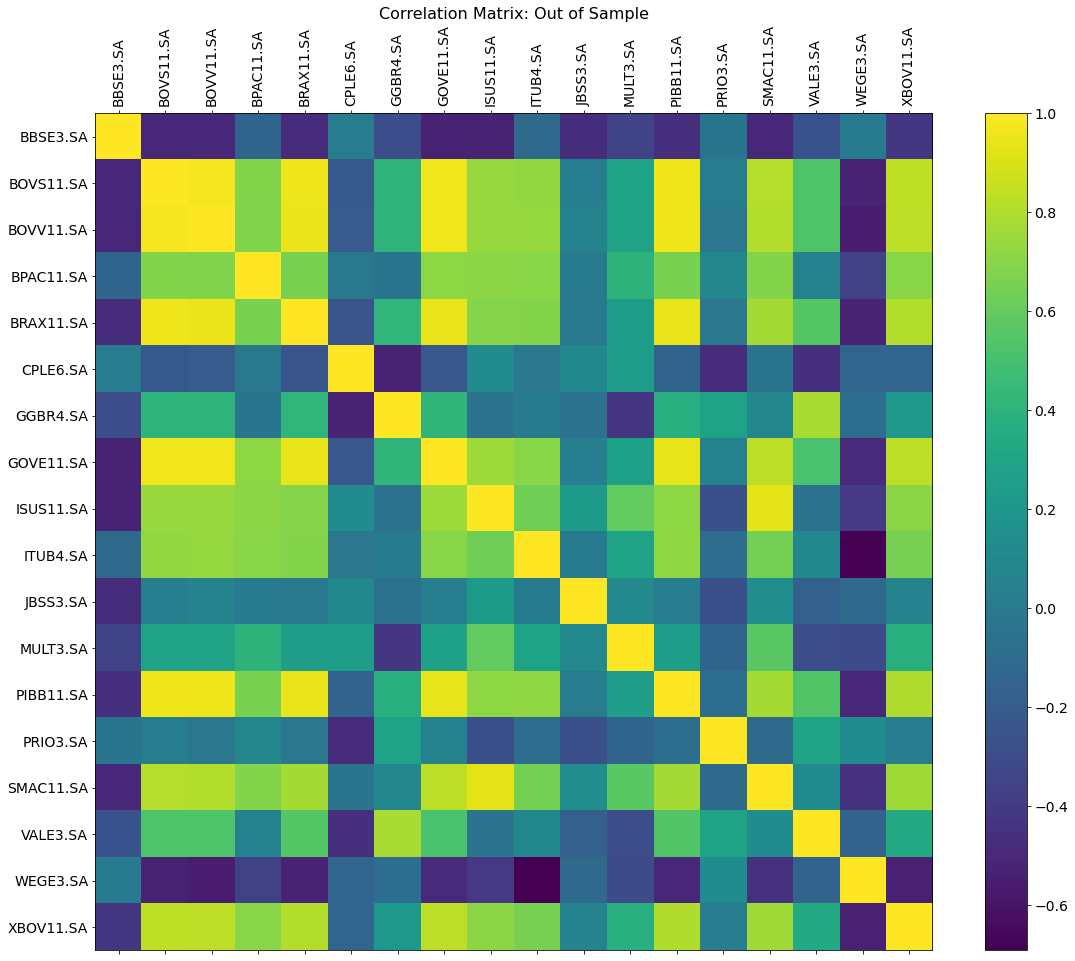

In [134]:
f_2 = plt.figure(figsize=(19, 15))
plt.matshow(s_2.corr(), fignum=f_2.number)
plt.xticks(range(s_2.select_dtypes(['number']).shape[1]), s.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(s_2.select_dtypes(['number']).shape[1]), s.select_dtypes(['number']).columns, fontsize=14)
cb_2 = plt.colorbar()
cb_2.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix: Out of Sample', fontsize=16);

In [135]:
exp_return_2 = expected_returns.mean_historical_return(df_out)
exp_return_2

BBSE3.SA    -0.094593
BOVS11.SA    0.379257
BOVV11.SA    0.395515
BPAC11.SA    1.215432
BRAX11.SA    0.364156
CPLE6.SA     0.304730
GGBR4.SA     0.063765
GOVE11.SA    0.411632
ISUS11.SA    0.282030
ITUB4.SA     0.303124
JBSS3.SA     0.246980
MULT3.SA    -0.040075
PIBB11.SA    0.402563
PRIO3.SA     1.255236
SMAC11.SA    0.439799
VALE3.SA     0.002722
WEGE3.SA    -0.234080
XBOV11.SA    0.375348
dtype: float64

In [136]:
#Sharp ratio

ef_2 = EfficientFrontier(mean_2, s_2)

ef_2.add_objective(objective_functions.L2_reg, gamma = 1)

w_2 = ef_2.max_sharpe()

cleaned_weights_2  = ef_2.clean_weights()
cleaned_weights_2_ = cleaned_weights_2.values()
cleaned_weights_2_ = list(cleaned_weights_2_)
cleaned_weights_2_ = np.array(cleaned_weights_2_)

print(cleaned_weights_2)

OrderedDict([('BBSE3.SA', 0.0), ('BOVS11.SA', 0.05498), ('BOVV11.SA', 0.05798), ('BPAC11.SA', 0.21557), ('BRAX11.SA', 0.05354), ('CPLE6.SA', 0.04785), ('GGBR4.SA', 0.0), ('GOVE11.SA', 0.06217), ('ISUS11.SA', 0.03505), ('ITUB4.SA', 0.03799), ('JBSS3.SA', 0.03092), ('MULT3.SA', 0.0), ('PIBB11.SA', 0.05924), ('PRIO3.SA', 0.22656), ('SMAC11.SA', 0.06444), ('VALE3.SA', 0.0), ('WEGE3.SA', 0.0), ('XBOV11.SA', 0.05372)])


In [137]:
ef_2.portfolio_performance(verbose=True)

Expected annual return: 75.1%
Annual volatility: 16.6%
Sharpe Ratio: 4.42


(0.7512311890523814, 0.1655346170338726, 4.417391371997755)

In [138]:
latest_prices_2 = get_latest_prices(df_out)
da_2 = DiscreteAllocation(w_2, latest_prices_2, total_portfolio_value=portfolio_value)
allocation_2, leftover_2 = da_2.lp_portfolio()
print('Qtd ações alocadas: ',allocation_2)
print('Sobrou: R$',leftover_2)

Qtd ações alocadas:  {'BOVS11.SA': 12, 'BOVV11.SA': 10, 'BPAC11.SA': 139, 'BRAX11.SA': 11, 'CPLE6.SA': 107, 'GOVE11.SA': 25, 'ISUS11.SA': 21, 'ITUB4.SA': 28, 'JBSS3.SA': 34, 'PIBB11.SA': 6, 'PRIO3.SA': 96, 'SMAC11.SA': 24, 'XBOV11.SA': 9}
Sobrou: R$ 5.689887825912592


In [139]:
allocation_df_2 = pd.DataFrame.from_dict(allocation_2, orient='index', columns=['Quantidade']).sort_values(by='Quantidade', ascending=False).reset_index().set_index('index')

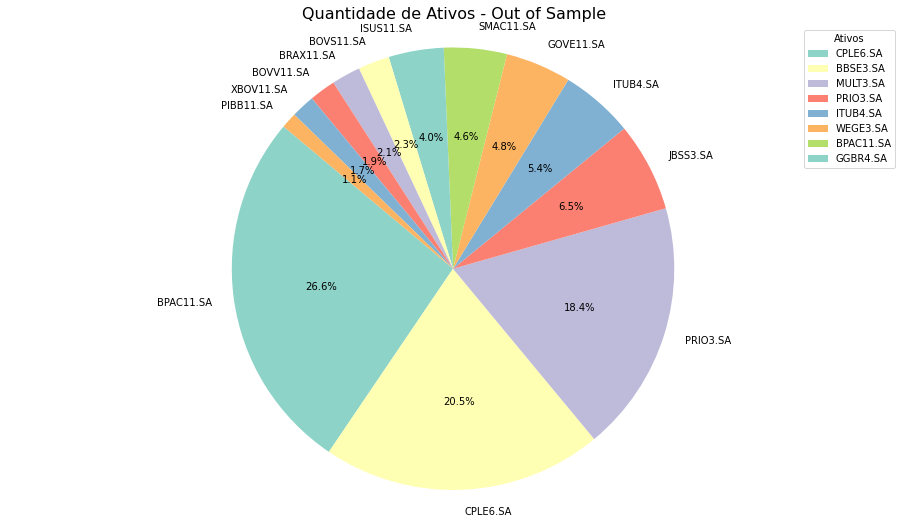

In [140]:
plt.figure(figsize=(16, 9), facecolor='white')

cores = sns.color_palette('Set3', n_colors=7)
plt.pie(allocation_df_2['Quantidade'], labels=allocation_df_2.index, autopct='%1.1f%%', startangle=140, colors=cores)

plt.axis('equal') 

plt.title('Quantidade de Ativos - Out of Sample', fontsize=16)
plt.legend(allocation_df.index, title="Ativos", loc="best")


plt.show()

# Backtest

Primeiro, tentaremos fazer o backtest da estratégia usando os pesos limpos do primeiro conjunto de dados, o que resultará em um overfit, porque os pesos limpos foram calculados usando o mesmo conjunto de dados. Em seguida, passaremos para o conjunto de dados fora da amostra (mesmas ações, período diferente) e reproduziremos as mesmas etapas.

## Backtest 1 - Overfit

In [141]:
opt_weights = np.full_like(carteira_etf_acoes, np.nan)
opt_weights[0,:] = cleaned_weights_
print(opt_weights.shape)

(330, 18)


In [142]:
#Vectorbt Backtest

pyopt_pf = vbt.Portfolio.from_orders(
    close = carteira_etf_acoes,
    size = opt_weights,
    size_type = 'targetpercent',
    group_by = True,
    cash_sharing = True,
    freq = 'd'
)

In [143]:
pyopt_pf.stats()

Start                         2022-01-03 00:00:00
End                           2023-04-28 00:00:00
Period                          330 days 00:00:00
Start Value                                 100.0
End Value                              162.308257
Total Return [%]                        62.308257
Benchmark Return [%]                    14.824464
Max Gross Exposure [%]                  99.999408
Total Fees Paid                               0.0
Max Drawdown [%]                        13.031686
Max Drawdown Duration            58 days 00:00:00
Total Trades                                    8
Total Closed Trades                             0
Total Open Trades                               8
Open Trade PnL                          62.308257
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN


In [144]:
pyopt_pf.plot(width=800, height=400, title='Overfit Backtest: Cumulative Returns').show();

In [145]:
pyopt_pf.plot_underwater(width=800, height=400, title='Overfit Backtest: Drawdown').show();

In [146]:
pyopt_pf.drawdowns.plot(top_n=3, width=800, height=400, title='Overfit Backtest: Drawdown').show()

## Backtest 2 - Out of Sample

In [147]:
opt_weights = np.full_like(df_out, np.nan)
opt_weights[0,:] = cleaned_weights_
print(opt_weights.shape)

(106, 18)


In [148]:
#Vectorbt Backtest

pyopt_pf = vbt.Portfolio.from_orders(
    close = df_out,
    size = opt_weights,
    size_type = 'targetpercent',
    group_by = True,
    cash_sharing = True,
    freq = 'd'
)

In [149]:
pyopt_pf.stats()

Start                         2023-05-02 00:00:00
End                           2023-09-29 00:00:00
Period                          106 days 00:00:00
Start Value                                 100.0
End Value                              109.384672
Total Return [%]                         9.384672
Benchmark Return [%]                    11.902753
Max Gross Exposure [%]                  99.999109
Total Fees Paid                               0.0
Max Drawdown [%]                         4.999734
Max Drawdown Duration            29 days 00:00:00
Total Trades                                    8
Total Closed Trades                             0
Total Open Trades                               8
Open Trade PnL                           9.384672
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN


In [150]:
pyopt_pf.plot(width=800, height=400, title='Out of Sample Backtest: Cumulative Returns').show();

In [151]:
pyopt_pf.plot_underwater(width=800, height=400, title='Out of Sample Backtest: Drawdown').show();

In [152]:
pyopt_pf.drawdowns.plot(top_n=3, width=800, height=400, title='Out of Sample Backtest: Drawdown').show()